In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\programdata\anaconda3\lib\site-packages (from plotly) (1.15.0)



In [3]:
import folium
from folium import plugins
import plotly.express as px
import plotly.graph_objects as go

In [4]:
#Setting the default plot size
plt.rcParams['figure.figsize']= 10,20


In [5]:
#Handling Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading The DataSets

In [6]:
covid_data = pd.read_csv(r"C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\NationalDaily.csv")
df_india = covid_data.copy()

In [7]:
df_india.head(5)

,Country,SYM,Date,Daily Test,Daily Positive
0,India,IND,21-03-2020,1125,33
1,India,IND,22-03-2020,1121,50
2,India,IND,23-03-2020,1462,54
3,India,IND,24-03-2020,1295,56
4,India,IND,25-03-2020,1717,72


In [8]:
covid_data.tail(5)

,Country,SYM,Date,Daily Test,Daily Positive
538,India,IND,10-09-2021,1724255,37489
539,India,IND,11-09-2021,1708136,35464
540,India,IND,12-09-2021,1678230,33793
541,India,IND,13-09-2021,1649316,32962
542,India,IND,14-09-2021,1607946,31434


In [9]:
#Coordinates of India States and Union Territories
India_coord = pd.read_excel('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\IndianCoordinates.xlsx')

In [10]:
India_coord.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [11]:
#Day By Day Data of India, japan, USA, italy on per Million basis
dbd_India = pd.read_excel('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\Covid19_cases_per_million.xlsx',parse_dates=True)
dbd_Italy = pd.read_excel('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\Covid19_cases_per_million_italy.xlsx',parse_dates=True)
dbd_JPY = pd.read_excel('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\Covid19_cases_per_million_JPY.xlsx',parse_dates=True)
dbd_USA = pd.read_excel('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\Covid19_cases_per_million_USA.xlsx',parse_dates=True)
dbd_Italy.head(5)

,Country,Unnamed: 1,Date,Test,Positive,Death
0,Italy,ITA,2020-02-25,143,5.334,0.166
1,Italy,ITA,2020-02-26,159,7.504,0.199
2,Italy,ITA,2020-02-27,199,10.850,0.282
3,Italy,ITA,2020-02-28,260,14.710,0.348
4,Italy,ITA,2020-02-29,309,18.686,0.480


## Analysing Covid19 Cases In India

In [12]:
#Total Number of Covid Cases appeard in India
#covid_data.drop(['SYM'],axis=1,inplace=True)
covid_data['Total Occured Cases']= covid_data['Daily Positive']
Total_Occured_Cases=covid_data['Total Occured Cases']
totalCases = Total_Occured_Cases.astype(int).sum()
print("Total Number for Covid 19 cases across India till date(14-09-2021): ",totalCases)

Total Number for Covid 19 cases across India till date(14-09-2021):  33232807


In [13]:
#Highlighting the DataFrame By Cases in State
df= pd.read_csv('C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\Latest Covid-19 India Status.csv')
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7572,6,7437,129,0.080000,98.220000,1.700000
1,Andhra Pradesh,2022064,14550,1993589,13925,0.720000,98.590000,0.690000
2,Arunachal Pradesh,53408,634,52507,267,1.190000,98.310000,0.500000
3,Assam,592616,6415,580491,5710,1.080000,97.950000,0.960000
4,Bihar,725759,55,716048,9656,0.010000,98.660000,1.330000
5,Chandigarh,65122,35,64273,814,0.050000,98.700000,1.250000
6,Chhattisgarh,1004668,354,990757,13557,0.040000,98.620000,1.350000
7,Dadra and Nagar Haveli and Daman and Diu,10665,2,10659,4,0.020000,99.940000,0.040000
8,Delhi,1437991,367,1412542,25082,0.030000,98.230000,1.740000
9,Goa,174486,885,170391,3210,0.510000,97.650000,1.840000


In [14]:
##Number Of Active Covid 19 Cases in Indian States
df['Total Active'] = df['Total Cases']-(df['Discharged']+df['Deaths'])
total_active = df['Total Active']
TotalActive = total_active.astype(int).sum()
print('Total Number of Active Cases in India: ',TotalActive)
Total_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending= False).to_frame()
Total_Cases.style.background_gradient(cmap= 'Reds')


Total Number of Active Cases in India:  392864


,Total Active
Name of State / UT,
Kerala,239338
Maharashtra,51234
Karnataka,17412
Tamil Nadu,16256
Andhra Pradesh,14550
Mizoram,11414
West Bengal,8480
Assam,6415
Odisha,6322


In [27]:
##Let See The Above Data In form Of Maps
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'].astype(int), df_full['Longitude'].astype(int), df_full['Total Active'].astype(int), df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.2, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Total Active</strong>: ' + str(value) + ''),color='red',fill_color='',fill_opacity=0.3 ).add_to(map)
map

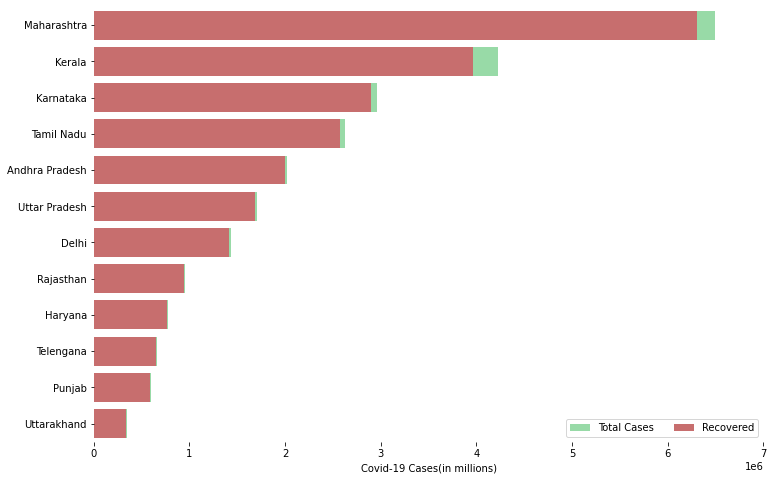

In [16]:
f,ax=plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT','Total Cases','Discharged','Deaths']]
data.sort_values('Total Cases',ascending=False, inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x="Total Cases",y="Name of State / UT",data=data,label="Total Cases",color ="g")
sns.set_color_codes('muted')
sns.barplot(x="Discharged",y = "Name of State / UT", data= data, label = "Recovered",color="r")

#Adding legends
ax.legend(ncol=2, loc="lower right",frameon = True)
ax.set(xlim=(0,7000000),ylabel="",xlabel="Covid-19 Cases(in millions)")
sns.despine(left =True,bottom = True)

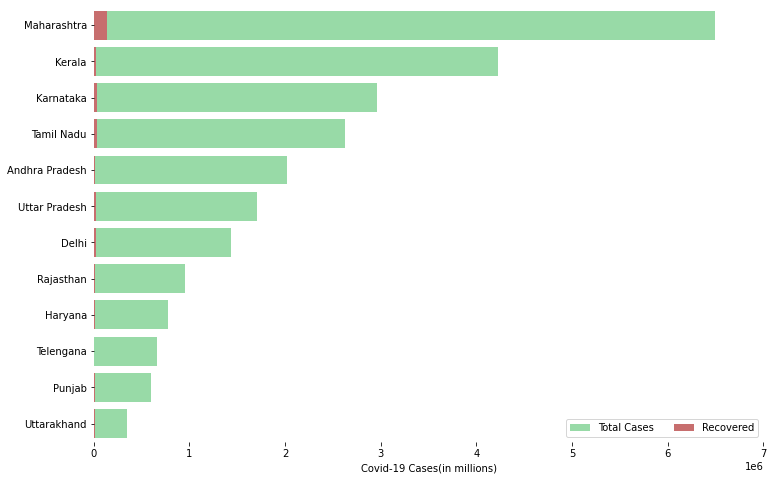

In [17]:
#Comparing the Positive and Death due to Covid 19 in India
f,ax=plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT','Total Cases','Discharged','Deaths']]
data.sort_values('Total Cases',ascending=False, inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x="Total Cases",y="Name of State / UT",data=data,label="Total Cases",color ="g")
sns.set_color_codes('muted')
sns.barplot(x="Deaths",y = "Name of State / UT", data= data, label = "Recovered",color="r")

#Adding legends
ax.legend(ncol=2, loc="lower right",frameon = True)
ax.set(xlim=(0,7000000),ylabel="",xlabel="Covid-19 Cases(in millions)")
sns.despine(left =True,bottom = True)

## Covid-19 Cases Rising In India

In [18]:
import plotly
plotly.io.renderers.default ='colab'
plotly.offline.init_notebook_mode (connected = True)

In [32]:
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Daily Positive'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [33]:
import plotly.express as px
fig = px.bar(df_india, x= "Date",y="Daily Positive",barmode='group',height = 400)
fig.update_layout(title_text ='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

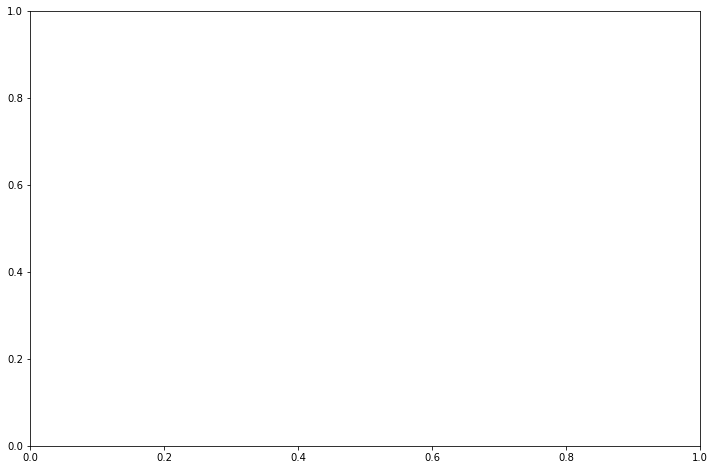

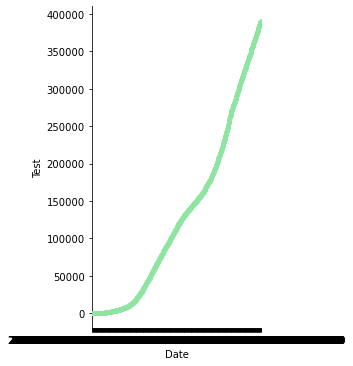

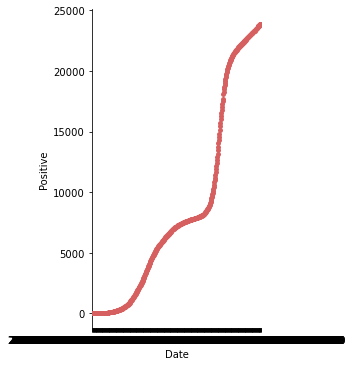

In [21]:
f,ax=plt.subplots(figsize=(12,8))
data = dbd_India[['Country','Date','Test','Positive','Death']]
sns.set_color_codes('pastel')
sns.catplot(x="Date",y="Test",data=data,label="Total Test On per Day",color ="g")
sns.set_color_codes('muted')
sns.catplot(x="Date",y = "Positive", data= data, label = "Per day Positive",color="r")




## Comparing India Cases Trend with USA, JPY & Italy 

In [34]:
import plotly.express as px
fig = px.bar(dbd_India, x= "Date",y="Positive",color = 'Positive',orientation='v',title ='confirmed Cases in India on per million bases',
             color_discrete_sequence = px.colors.cyclical.IceFire,height = 500)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(dbd_Italy, x= "Date",y="Positive",color = 'Positive',orientation='v',title ='confirmed Cases in Italy on per million bases',
             color_discrete_sequence = px.colors.cyclical.IceFire,height = 400)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(dbd_USA, x= "Date",y="Positive",color = 'Positive',orientation='v',title ='confirmed Cases in USA on per million bases',
             color_discrete_sequence = px.colors.cyclical.IceFire,height = 400)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(dbd_JPY, x= "Date",y="Positive",color = 'Positive',orientation='v',title ='confirmed Cases in JPY on per million bases',
             color_discrete_sequence = px.colors.cyclical.IceFire,height = 400)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

## Comparing the covid cases around the world in millions

In [35]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,specs=[[{},{}],[{"colspan":2},None]],
                   subplot_titles=("India","Italy","USA","JPY"))

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Positive'],
                    marker = dict(color=dbd_India['Positive'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Positive'],
                 
                     marker = dict(color=dbd_Italy['Positive'],coloraxis='coloraxis')),1,2)

#fig.add_trace(go.Bar(x=dbd_JPY['Date'],y=dbd_JPY['Positive'],
 #                   marker = dict(color=dbd_JPY['Positive'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=dbd_USA['Date'],y=dbd_USA['Positive'],
                    marker = dict(color=dbd_USA['Positive'],coloraxis='coloraxis')),2,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Confirmed Cases per million basis")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()


## Directly Comparing The Cases Of India with other Countries And the date of sperading

In [24]:
title ="Comparision"
labels=['USA','Italy','India','JPY']
colors = ['rgb(49,130,189)','rgb(122,0,0)','rgb(255,0,0)','rgb(122,82,0)']
mode_size = [10,10,12,10]
line_size=[1,1,1,1]
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_USA['Date'],y=dbd_USA['Positive'],
                        mode='lines',name=labels[0],
                        line=dict(color=colors[0],width=line_size[0]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Positive'],
                        mode='lines',name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Positive'],
                        mode='lines',name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_JPY['Date'],y=dbd_JPY['Positive'],
                        mode='lines',name=labels[3],
                        line=dict(color=colors[3],width=line_size[3]),
                                  connectgaps=True))

annotations = []
annotations.append(dict(xref='paper',yref='paper',x=0.5,y=-0.1,
                  xanchor='center',yanchor='top',text='Comparing covid cases on per million basis',
                   font =dict(family ='Arial',
                             size = 12,color='rgb(150,150,150)'),
                   showarrow=False))
fig.update_layout(annotations= annotations, plot_bgcolor='white',yaxis_title='Comparing case on per million basis')
fig.show()

## Directly Comparing The Deaths due to Covid-19 on per million basis

In [36]:
title ="Comparision"
labels=['USA','Italy','India','JPY']
colors = ['rgb(49,130,189)','rgb(122,0,0)','rgb(255,0,0)','rgb(122,82,0)']
mode_size = [10,10,12,10]
line_size=[1,1,1,1]
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_USA['Date'],y=dbd_USA['Death'],
                        mode='lines',name=labels[0],
                        line=dict(color=colors[0],width=line_size[0]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Death'],
                        mode='lines',name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Death'],
                        mode='lines',name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),
                                  connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_JPY['Date'],y=dbd_JPY['Death'],
                        mode='lines',name=labels[3],
                        line=dict(color=colors[3],width=line_size[3]),
                                  connectgaps=True))

annotations = []
annotations.append(dict(xref='paper',yref='paper',x=0.5,y=-0.1,
                  xanchor='center',yanchor='top',text='Comparing covid cases on per million basis',
                   font =dict(family ='Arial',
                             size = 12,color='rgb(150,150,150)'),
                   showarrow=False))
fig.update_layout(annotations= annotations, plot_bgcolor='white',yaxis_title='Comparing case on per million basis')
fig.show()

## Forecasting Confirmed Cvid19 Cases WorldWide

In [26]:
df_confirmed=pd.read_csv(r"C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\time_series_covid19_confirmed_global.csv")
df_deaths=pd.read_csv(r"C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\time_series_covid19_deaths_global.csv")
df_recovered=pd.read_csv(r"C:\ProgramData\Anaconda3\Lib\site-packages\pandas\DataSets\Covid19\time_series_covid19_recovered_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)

df_deaths.head()


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7164,7167,7167,7169,7171,7174,7183,7186,7186,7186
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2535,2539,2543,2548,2553,2557,2563,2569,2574,2580
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5539,5558,5578,5596,5614,5630,5651,5670,5681,5694
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1322,1327,1339,1345,1358,1360,1371,1378,1388,1388


In [26]:
from fbprophet import Prophet
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

KeyError: 'Date'

In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()